# Forcasting Prices 

* For this task we will be using the same dataset from data analysis part


* Forcasting commodity prices belongs to class of problem known as Time Series Analysis.


* Time Series is a collection of data points collected at constant time intervals.These are analyzed to determine the long term trend so as to forecast the future or perform some other form of analysis.


* A time series is different from a classical regression problem first the time series is time dependent and second of all most time series have some form of seasonality trends, i.e. variations specific to a particular time frame. For example, if you see the sales of a ice-cream over time, you will invariably find higher sales in summers seasons.

### Loading Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
df = pd.read_csv('preprocessed_mandi.csv',sep = ',')
df.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,wheat(husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,wheat(husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,sorgum(jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


### For this task I will select a single commodity and try to forcast prices. 

* Lets select something that is available throughout the year

In [80]:
df.groupby('Commodity').mean()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
Commodity,,,,,
amba koy,2016.000000,228.333333,2791.666667,3875.000000,3333.333333
ambat chuka,2015.382353,33.617647,657.088235,1230.470588,752.205882
amla,2014.916667,47.916667,1079.000000,2117.791667,1616.875000
apple,2015.416309,9288.000000,5296.171674,9400.836910,7459.866953
arvi,2015.277778,1517.148148,1947.203704,2420.129630,2181.277778
aster,2015.666667,11.000000,7066.666667,8600.000000,8293.333333
awala,2015.151515,53.757576,1178.303030,1729.454545,1450.393939
bajri,2015.323956,648.692242,1389.206735,1608.656863,1507.257460
banana,2015.346505,7968.334347,694.118541,1028.045593,886.252280


In [81]:
def category_month(temp):
    temp.index = pd.CategoricalIndex(temp.index, 
                               categories=['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December'], 
                               sorted=True)
    temp = temp.sort_index()
    temp = temp.drop('Year',axis = 1)
    temp.arrivals_in_qtl = temp.arrivals_in_qtl.round()
    temp.min_price = temp.min_price.round()
    temp.max_price = temp.max_price.round()
    temp.modal_price = temp.modal_price.round()

    return temp

In [138]:
sugar = df[df.Commodity=='sugar'].groupby('Month').mean()
sugar = category_month(sugar)
sugar

,arrivals_in_qtl,min_price,max_price,modal_price
Month,,,,
January,113786.0,2890.0,3128.0,3008.0
February,105970.0,2907.0,3162.0,3034.0
March,118292.0,2913.0,3146.0,3029.0
April,112240.0,3024.0,3246.0,3136.0
May,98938.0,3026.0,3310.0,3168.0
June,95026.0,2938.0,3226.0,3082.0
July,106311.0,2884.0,3176.0,3028.0
August,86964.0,3010.0,3220.0,3114.0
September,110867.0,3045.0,3290.0,3169.0


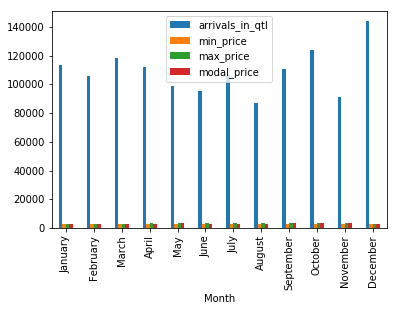

In [139]:
sugar.plot(kind = 'bar')


#### We chose sugar since it is available throughout year the and and there is variation in price throughout the year.

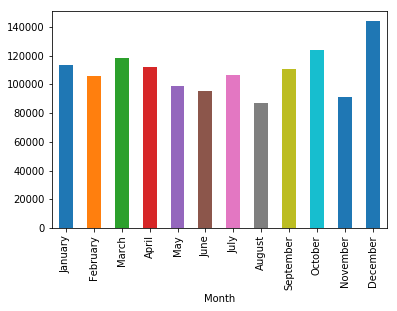

In [140]:
sugar.arrivals_in_qtl.plot(kind='bar')

### Preprocessing Dataset

In [141]:
sugar = df[df['Commodity']=='sugar']
sugar = sugar.reset_index()
sugar.head()

,index,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,25637,Mumbai,sugar,2015,April,136712,2489,2715,2602,2015-04,Mumbai,Maharashtra
1,25638,Mumbai,sugar,2016,April,87767,3560,3778,3669,2016-04,Mumbai,Maharashtra
2,25757,Mumbai,sugar,2015,August,83635,2365,2566,2466,2015-08,Mumbai,Maharashtra
3,25758,Mumbai,sugar,2016,August,90292,3654,3873,3763,2016-08,Mumbai,Maharashtra
4,25877,Mumbai,sugar,2014,December,141206,2725,3016,2872,2014-12,Mumbai,Maharashtra


In [142]:
#removing certain columns from the dataset
sugar.drop(['index','Commodity','state_name'],inplace = True,axis = 1)
sugar.head()

,APMC,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name
0,Mumbai,2015,April,136712,2489,2715,2602,2015-04,Mumbai
1,Mumbai,2016,April,87767,3560,3778,3669,2016-04,Mumbai
2,Mumbai,2015,August,83635,2365,2566,2466,2015-08,Mumbai
3,Mumbai,2016,August,90292,3654,3873,3763,2016-08,Mumbai
4,Mumbai,2014,December,141206,2725,3016,2872,2014-12,Mumbai


In [143]:
#changing the types of dates to datetime 
sugar['date'] =  pd.to_datetime(sugar['date'])
#sorting rows with respect to dates
sugar = sugar.sort_values(by = 'date')
#reseting the index
sugar.reset_index(inplace = True)
sugar.drop('index',inplace=True,axis=1)
sugar.head()

,APMC,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name
0,Mumbai,2014,September,118771,3038,3315,3180,2014-09-01,Mumbai
1,Mumbai,2014,October,124940,2947,3228,3089,2014-10-01,Mumbai
2,Mumbai,2014,November,90089,2872,3151,3011,2014-11-01,Mumbai
3,Mumbai,2014,December,141206,2725,3016,2872,2014-12-01,Mumbai
4,Mumbai,2015,January,132808,2699,2952,2825,2015-01-01,Mumbai


In [144]:
sugar_forcast = sugar[['date','modal_price']]
sugar_forcast

,date,modal_price
0,2014-09-01,3180
1,2014-10-01,3089
2,2014-11-01,3011
3,2014-12-01,2872
4,2015-01-01,2825
5,2015-02-01,2801
6,2015-03-01,2671
7,2015-04-01,2602
8,2015-05-01,2615
9,2015-06-01,2479


In [145]:
#setting dates as index
sugar_forcast.set_index('date', inplace=True)

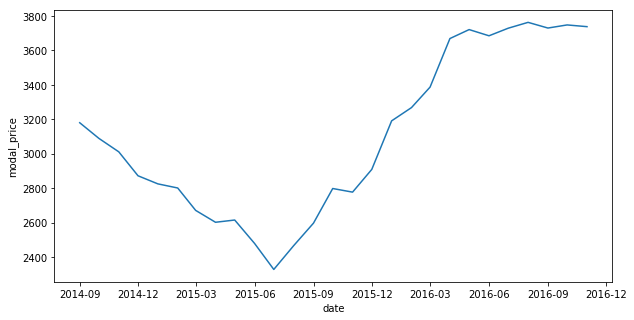

In [146]:
#could observe spikes during end of the years thats because prices increases during winter.
plt.figure(figsize=(10,5))
plt.xlabel('date')
plt.ylabel('modal_price')
plt.plot(sugar_forcast)
plt.show()

### So we have our dataset now and we can proceed forward towards our objective

In [147]:
#printing the index of the dataset
sugar_forcast.index

DatetimeIndex(['2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01'],
              dtype='datetime64[ns]', name='date', freq=None)

#### 1. Check for Stationarity

* What is stationary- Stationary Time Series is something whose statistical metric like mean, standard deviation ,variance remain constant over time.


* It is important because Time series work on an assumption that it is stationary. 


* Intuitively, we can sat that if a Time Series has a particular behaviour over time, there is a very high probability that it will follow the same in the future.


* Checking for stationarity is a very strict criterian because the data need to have constant mean ,constant variance which doesn't happen in a real world dataset.


* However there are certain methods that that can give an intution whether or not your TS is stationary or not.


* One of the methods is **Rolling Statistics** and the other one is **Dickey Fuller Test**.


* Rolling Statistics is basically plotting the moving average or variance with respect to time an observe if it varies progressively with time.


* Dickey Fuller Test is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

### Driver function for Rolling Statistics and Dickey Fuller Test 

In [148]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    plt.figure(figsize=(10,5))
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=3).mean()
    rolstd = timeseries.rolling(window=3).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['modal_price'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

* About the code above the first section will calculate rolling statistics .The "window" arguement defines how much previous values you want to take to for average to get the current value.


* The second section is just plotting the above section.


* And the third section is Dickey fuller test.

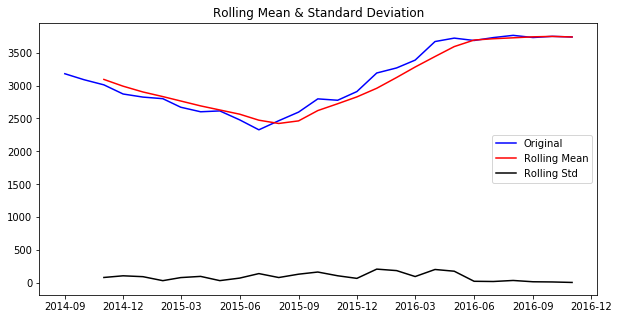

Results of Dickey-Fuller Test:
Test Statistic                 -1.791774
p-value                         0.384553
#Lags Used                      3.000000
Number of Observations Used    23.000000
Critical Value (5%)            -2.998500
Critical Value (1%)            -3.752928
Critical Value (10%)           -2.638967
dtype: float64


In [149]:
test_stationarity(sugar_forcast)

* First observation from the above rolling statistics is that mean is increasing slightly and the standard deviation is not constant.


* Second observation seems a good as the test statistic is less than 5% Critical value which mean we can with 95% confidence that the TS is stationary.


* But it's not that easy we can see there seems to some trends going on, hence the time series require further smoothning.

#### Eliminating Trends by Log Tranformation

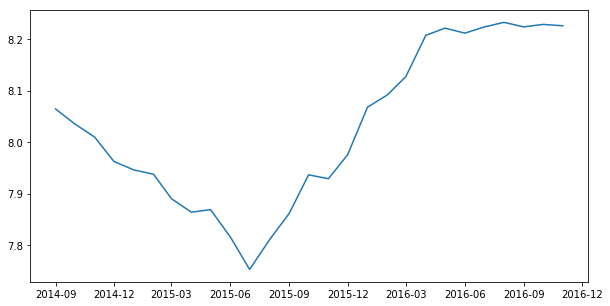

In [150]:
sugar_forcast_log = np.log(sugar_forcast)
plt.figure(figsize=(10,5))
plt.plot(sugar_forcast_log)
plt.show();

* We can see a trend forward so we apply "moving average" technique to smooth the trend slightly.

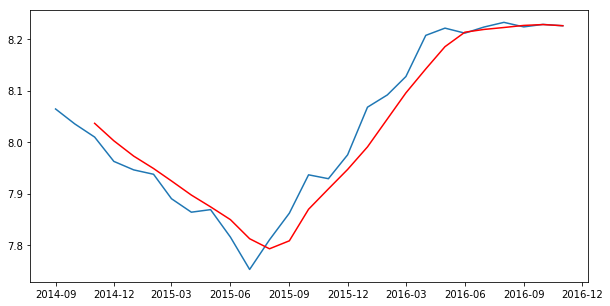

In [151]:
sugar_forcast_log_moving_avg = sugar_forcast_log.rolling(window=3).mean()
plt.figure(figsize=(10,5))
plt.plot(sugar_forcast_log)
plt.plot(sugar_forcast_log_moving_avg, color='red')
plt.show();

* The red line is the moving average after log tranformation. Lets now subtract  **Moving average log transformed series** from **Log transformed series** 

In [152]:
ts_log_moving_avg_diff = sugar_forcast_log - sugar_forcast_log_moving_avg
ts_log_moving_avg_diff.head(6)

,modal_price
date,
2014-09-01,NaN
2014-10-01,NaN
2014-11-01,-0.026728
2014-12-01,-0.040034
2015-01-01,-0.026755
2015-02-01,-0.011188


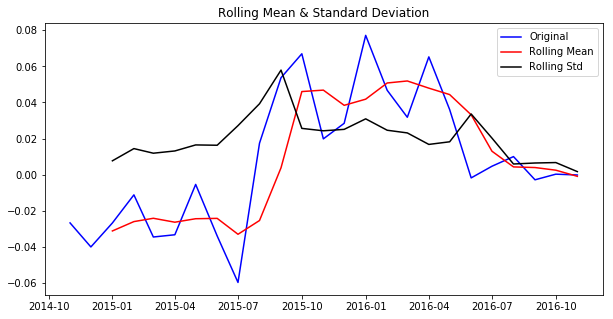

Results of Dickey-Fuller Test:
Test Statistic                 -3.096195
p-value                         0.026836
#Lags Used                      9.000000
Number of Observations Used    15.000000
Critical Value (5%)            -3.084908
Critical Value (1%)            -3.964443
Critical Value (10%)           -2.681814
dtype: float64


In [153]:
# Now check for stationarity and see if there is any difference or not
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

* Any upward trend has almost gone and the test statistic observations is significantly improved and so as the P value.

### We have used different approaches and there are better, more advance and generalise techniques that can be applied like Decompostion and Differencing .But for now we move to next section toward forcasting.

* We will use a famous technique called ARIMA for forcasting.


* ARIMA stands for Auto-Regressive Integrated Moving Averages.The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model: 


* Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).


* Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.


* Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.


* An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.


* Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).


* Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

### Removing Trends and Seasonality

In [154]:
# first apply differencing
ts_log_diff = sugar_forcast_log - sugar_forcast_log.shift()
ts_log_diff.dropna(inplace=True)

### Plotting ACF and PACF 

In [155]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [156]:
lag_acf = acf(ts_log_diff, nlags=3)
lag_pacf = pacf(ts_log_diff, nlags=3, method='ols')

Text(0.5,1,'Autocorrelation Function')

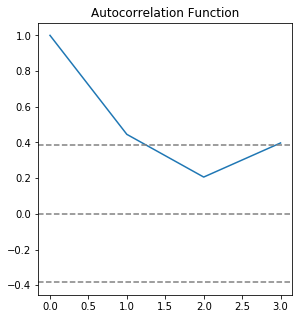

In [157]:
#Plot ACF: 
plt.figure(figsize=(10,5))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

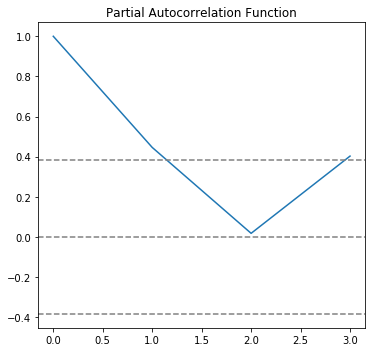

In [158]:
#Plot PACF:
plt.figure(figsize=(10,5))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

* Now the trick to predict the value p and q will be determine by PACF and ACF respectively.The point at which the lag (blue line) crosses the above dotted line (confidence interval) would be our p value. The same goes for q in ACF graph. 


* We can observe p to be 1 and q to be slightly less than 1 but we take 1 .

In [159]:
#Loading the ARIMA modal
from statsmodels.tsa.arima_model import ARIMA

c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.0343')

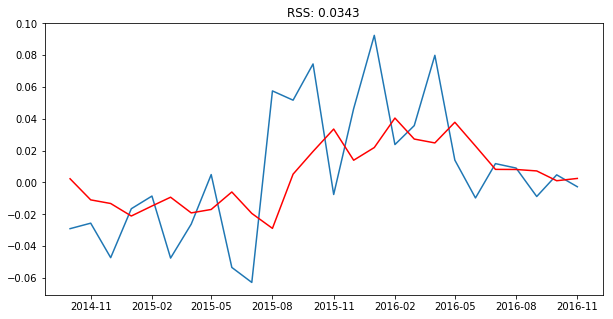

In [160]:
model = ARIMA(sugar_forcast_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.figure(figsize=(10,5))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff['modal_price'])**2))

* The RSS mentioned above stand for Residual Sum of Square a metric to verify the goodness of a model similar to RMSE(Root Mean Square Error).


* The lower this value the better is the model.

### Predictions

In [161]:
# these prediction are on a differencing log scale remember we have fitted log values after differencing .So we need to rescale them to original values.
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date
2014-10-01    0.002349
2014-11-01   -0.010925
2014-12-01   -0.013204
2015-01-01   -0.021070
2015-02-01   -0.014780
dtype: float64


In [162]:
# first take the cumulatice sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

date
2014-10-01    0.002349
2014-11-01   -0.008576
2014-12-01   -0.021780
2015-01-01   -0.042850
2015-02-01   -0.057630
dtype: float64


In [163]:
## now adding the base no. which can be done by creating a series from original dataset and adding them to the differences calculated above.
predictions_ARIMA_log = pd.Series(sugar_forcast_log['modal_price'].iloc[0], index=sugar_forcast_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
2014-09-01    8.064636
2014-10-01    8.066986
2014-11-01    8.056061
2014-12-01    8.042857
2015-01-01    8.021787
dtype: float64

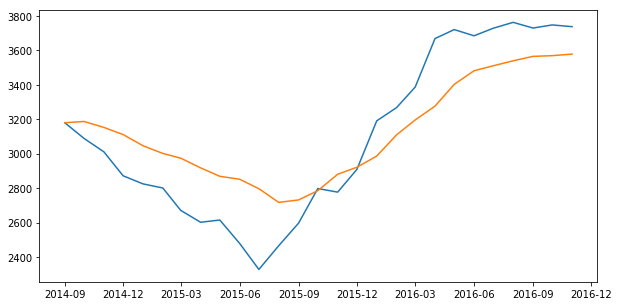

In [164]:
# now we take the exponent
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(10,5))
plt.plot(sugar_forcast)
plt.plot(predictions_ARIMA)


* The Prediction doesn't seems promising but with more data and further preprocessing it can be improved . Lets now do some forecasting.

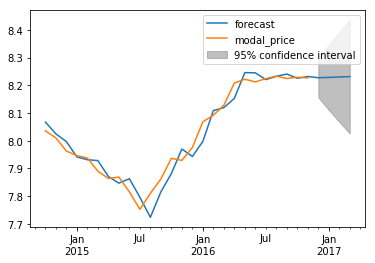

<Figure size 720x360 with 0 Axes>

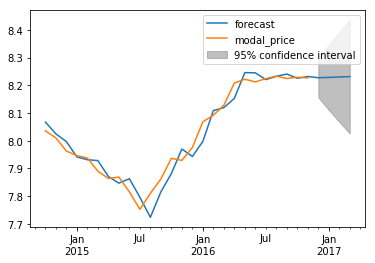

In [165]:
plt.figure(figsize=(10,5))
results_ARIMA.plot_predict(1,30)

* This model may not be as good and need further preprocessing but the approach should be same with some more generalised methods.